# Sherlin Whaley - 2019
# Bethel Tech - Powered by Woz U

# Predicting Student Grades

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

# Read in Data

In [2]:
url = 'https://raw.githubusercontent.com/swhaley01/Predicting-Student-Grades/master/AllResults.csv'
Grades = pd.read_csv(url)
Grades.head(10)

,PPID,PP,EAL,SEN,HML,Re,Wr,Ma,Att8Est,Att8Act,Att8Diff,EngEst,EngAct,EngDiff,MathsEst,MathsAct,MathsDiff,EbaccEst,EbaccAct,EbaccDiff
0,617,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,1.5,NaN,NaN,2.0,NaN,NaN,0.0,NaN
1,283,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,3.0,NaN,NaN,5.5,NaN,NaN,3.7,NaN
2,75,0.0,0,0.0,M,NaN,NaN,3,2.9,4.1,1.17,3.5,4.0,0.54,2.9,4.0,1.13,1.9,1.3,-0.57
3,1019,1.0,0,0.0,L,NaN,NaN,3,2.2,3.5,1.26,2.8,4.0,1.18,2.0,3.0,0.98,1.2,2.0,0.84
4,474,0.0,0,0.0,L,3C,3B,N,1.7,2.9,1.21,2.2,3.0,0.76,1.3,3.0,1.65,0.7,2.0,1.28
5,20,0.0,0,0.0,H,5B,5C,5C,5.8,6.6,0.74,6.0,7.0,1.03,5.9,7.0,1.13,5.6,5.5,-0.08
6,313,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,0.0,NaN
7,443,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN
8,844,0.0,0,0.0,M,4B,3A,5B,4.9,4.8,-0.11,5.3,5.5,0.24,4.8,7.0,2.15,4.5,2.0,-2.51
9,362,0.0,1,0.0,M,NaN,NaN,4B,3.9,5.4,1.48,4.3,5.5,1.19,3.8,5.5,1.69,3.1,6.0,2.89


- PPID:  Random number associated with students.  Each number is unique.
- PP: Pupil Premium.  This denotes if students received additional funding for publicly funded schools. This is designed to help disadvantaged students of all levels of abilities perform better and close the gap between them and their peers.
- EAL: Students that speak English as a second language.
- SEN: Students that have special education needs.
- HML: Ability based on data results. (Rated as Higher, Middle and Lower)
- Re: Reading grade from age 10.
- Wr: Writing grade from age 10.
- Ma: Math grade from age 10.
- Att8Est: Estimated grades based on grades at age 10.
- Att8Act: Actual grades.
- Att8Diff: Difference between estimated grade and the actual grade.
- EngEst: Estimated English grade.
- EngAct: Actual English Grade.
- EngDiff: Difference between the estimated English grade and the actual English grade.
- MathsEst: Estimated Math grade.
- MathsAct: Actual Math Grade.
- MathsDiff: Difference between the estimated Math grade and the actual Math grade.
- EbaccEst: Proportion of students receiving a grade of a C or higher Estimated.
- EbaccAct: Actual students receiving a grade of a C or higher.
- EbaccDiff: Difference between the estimated Ebacc grade and the Ebacc grade.


# Data Wrangling

In [3]:
Grades.shape

(1037, 20)

- There are 1037 rows and 20 columns.

In [4]:
Grades2 = Grades.dropna()

- Dropped NAN's from the data

In [5]:
Grades2.head(10)

,PPID,PP,EAL,SEN,HML,Re,Wr,Ma,Att8Est,Att8Act,Att8Diff,EngEst,EngAct,EngDiff,MathsEst,MathsAct,MathsDiff,EbaccEst,EbaccAct,EbaccDiff
4,474,0.0,0,0.0,L,3C,3B,N,1.7,2.9,1.21,2.2,3.0,0.76,1.3,3.0,1.65,0.7,2.0,1.28
5,20,0.0,0,0.0,H,5B,5C,5C,5.8,6.6,0.74,6.0,7.0,1.03,5.9,7.0,1.13,5.6,5.5,-0.08
8,844,0.0,0,0.0,M,4B,3A,5B,4.9,4.8,-0.11,5.3,5.5,0.24,4.8,7.0,2.15,4.5,2.0,-2.51
10,407,1.0,0,0.0,L,4B,4C,3B,2.8,3.8,0.94,3.4,4.0,0.63,2.8,3.0,0.24,1.8,2.7,0.90
11,327,0.0,0,0.0,M,4C,4B,4B,3.7,4.4,0.64,4.2,4.0,-0.16,3.7,5.5,1.82,2.9,4.0,1.09
13,887,1.0,0,0.0,L,3C,4C,3C,2.0,1.1,-0.92,2.6,1.5,-1.11,1.8,0.0,-1.76,1.0,0.3,-0.64
14,503,0.0,0,0.0,M,4A,4C,4B,3.9,2.3,-1.62,4.3,2.0,-2.31,3.8,3.0,-0.81,3.1,0.3,-2.78
15,851,0.0,0,0.0,M,5C,4C,4C,3.7,2.7,-1.06,4.2,3.0,-1.16,3.7,3.0,-0.68,2.9,0.5,-2.41
17,215,0.0,0,1.0,M,4C,3A,4B,3.3,3.4,0.09,3.8,4.0,0.18,3.3,4.0,0.70,2.4,1.0,-1.39
19,415,0.0,0,0.0,L,4B,3A,3C,2.5,3.7,1.13,3.1,5.5,2.39,2.4,3.0,0.60,1.4,1.0,-0.45


In [6]:
Grades2.shape

(910, 20)

- There are now 910 rows and 20 columns in the dataframe.

In [7]:
Grades2.Att8Act.value_counts()

3.7    27
4.0    26
3.8    26
4.5    26
4.2    25
3.4    24
3.3    24
3.1    23
4.4    22
4.8    21
2.9    21
2.7    21
3.5    20
4.6    19
3.9    19
2.3    18
3.6    18
3.0    18
3.2    17
2.6    17
2.5    17
4.1    16
2.2    16
5.8    16
2.8    16
2.4    15
2.1    15
1.7    15
1.5    15
4.3    15
       ..
5.9     6
6.3     6
6.1     6
6.2     6
0.4     6
6.6     5
0.9     5
6.4     5
5.6     5
0.7     5
0.5     5
0.6     4
6.8     4
6.7     3
6.5     3
7.3     3
7.5     2
0.3     2
7.4     2
1.3     2
8.5     1
8.1     1
8.3     1
7.8     1
7.7     1
0.1     1
7.9     1
8.4     1
8.2     1
8.0     1
Name: Att8Act, Length: 84, dtype: int64

In [8]:
Grades2.EngAct.value_counts()

4.0    195
3.0    192
5.5    108
2.0    103
5.0     81
7.0     71
6.0     62
1.0     22
0.0     21
1.5     20
8.0     13
9.0      9
8.5      6
0.8      3
0.5      3
2.8      1
Name: EngAct, dtype: int64

- EngAct counts of each value. 
- 0.8 and 2.8 values need to be removed as these values are not options for scores.

In [10]:
indexNames = Grades2[ Grades2['EngAct'] == 2.8 ].index

Grades2.drop(indexNames , inplace=True)
warnings.filterwarnings("ignore")

In [11]:
indexNames2 = Grades2[ Grades2['EngAct'] == 0.8 ].index

Grades2.drop(indexNames2 , inplace=True)

- Dropped EngAct values that were 2.8 and 0.8.

In [12]:
Grades2.EngAct.value_counts()

4.0    195
3.0    192
5.5    108
2.0    103
5.0     81
7.0     71
6.0     62
1.0     22
0.0     21
1.5     20
8.0     13
9.0      9
8.5      6
0.5      3
Name: EngAct, dtype: int64

- EngAct counts of each value after removing error values.

In [13]:
Grades2.MathsAct.value_counts()

4.0    233
3.0    228
2.0     92
5.0     76
0.0     67
7.0     53
5.5     49
1.0     39
6.0     38
8.0     15
8.5     12
9.0      2
1.5      2
Name: MathsAct, dtype: int64

- MathsAct counts of each value.

In [14]:
Grades2.EbaccAct.value_counts()

0.0    66
3.3    57
2.7    50
1.0    48
0.7    45
2.3    43
0.3    42
3.7    41
4.0    40
2.0    39
3.0    39
5.0    29
1.5    29
1.3    28
1.7    27
4.5    26
6.0    23
5.5    23
1.8    22
1.2    22
7.0    19
0.5    19
2.2    14
4.3    12
2.8    11
2.5    10
5.3     9
4.2     9
0.8     9
6.5     7
5.7     6
7.5     6
4.7     6
6.3     5
8.0     4
3.8     4
3.2     4
5.2     4
7.7     3
8.5     2
9.0     1
7.3     1
5.8     1
6.7     1
Name: EbaccAct, dtype: int64

- EbaccAct counts of each value.

In [15]:
Grades2.to_excel('data_set_2.xlsx')

In [16]:
Grades2.shape

(906, 20)

- There are now 906 rows and 20 columns in the dataframe.

In [17]:
Grades2.to_excel('data_set_2.xlsx')

- Export data to excel.

In [18]:
Grades2.Att8Act.describe()

count    906.000000
mean       3.665453
std        1.677662
min        0.000000
25%        2.500000
50%        3.700000
75%        4.700000
max        8.500000
Name: Att8Act, dtype: float64

- The mean for the actual grades is 3.65.
- The standard deviation for the actual grades is 1.68.
- The minimum value for the actual grades is 0.
- The maximum value for the actual grades is 8.5.

In [19]:
Grades2.EngAct.describe()

count    906.000000
mean       4.105408
std        1.837360
min        0.000000
25%        3.000000
50%        4.000000
75%        5.500000
max        9.000000
Name: EngAct, dtype: float64

- The mean for the english actual grades is 4.09.
- The standard deviation for the english actual grades is 1.84.
- The minimum value for the english actual grades is 0.
- The maximum value for the english actual grades is 9.0.

In [20]:
Grades2.MathsAct.describe()

count    906.000000
mean       3.676049
std        1.905117
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: MathsAct, dtype: float64

- The mean for the math actual grades is 3.68.
- The standard deviation for the math actual grades is 1.90.
- The minimum value for the math actual grades is 0.
- The maximum value for the math actual grades is 9.0.

In [21]:
Grades2.EbaccAct.describe()

count    906.000000
mean       2.700442
std        1.939824
min        0.000000
25%        1.000000
50%        2.400000
75%        4.000000
max        9.000000
Name: EbaccAct, dtype: float64

- The mean for the english baccalaureate actual grades is 2.70.
- The standard deviation for the english baccalaureate actual grades is 1.94.
- The minimum value for the english baccalaureate actual grades is 0.
- The maximum value for the english baccalaureate actual grades is 9.0.

In [22]:
Gradesnumerical = Grades2.drop(['PPID', 'PP', 'EAL','SEN', 'HML', 'Re', 'Wr', 'Ma' ], axis = 1)

- Dropped non-numerical variables

In [23]:
Gradesnumerical.head()

,Att8Est,Att8Act,Att8Diff,EngEst,EngAct,EngDiff,MathsEst,MathsAct,MathsDiff,EbaccEst,EbaccAct,EbaccDiff
4,1.7,2.9,1.21,2.2,3.0,0.76,1.3,3.0,1.65,0.7,2.0,1.28
5,5.8,6.6,0.74,6.0,7.0,1.03,5.9,7.0,1.13,5.6,5.5,-0.08
8,4.9,4.8,-0.11,5.3,5.5,0.24,4.8,7.0,2.15,4.5,2.0,-2.51
10,2.8,3.8,0.94,3.4,4.0,0.63,2.8,3.0,0.24,1.8,2.7,0.90
11,3.7,4.4,0.64,4.2,4.0,-0.16,3.7,5.5,1.82,2.9,4.0,1.09


# Correlation Matrices

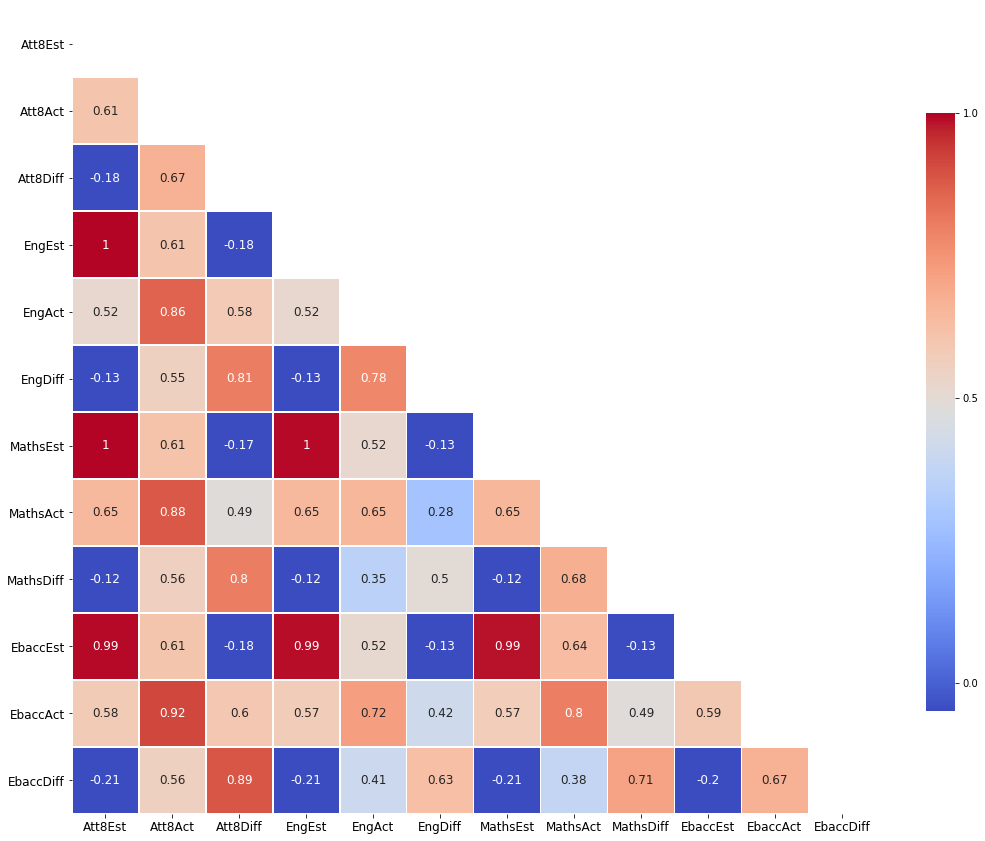

In [24]:
corr_matrix = Gradesnumerical.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(18, 22))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .75,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -.05,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize = 12)
ax.set_xticklabels(corr_matrix.columns, fontsize = 12)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

- This heatmap correlation matrix shows that estimated grades are highly correlated with the other various estimated grades.
- The highly correlated variables will be removed to avoid multicollinearity.

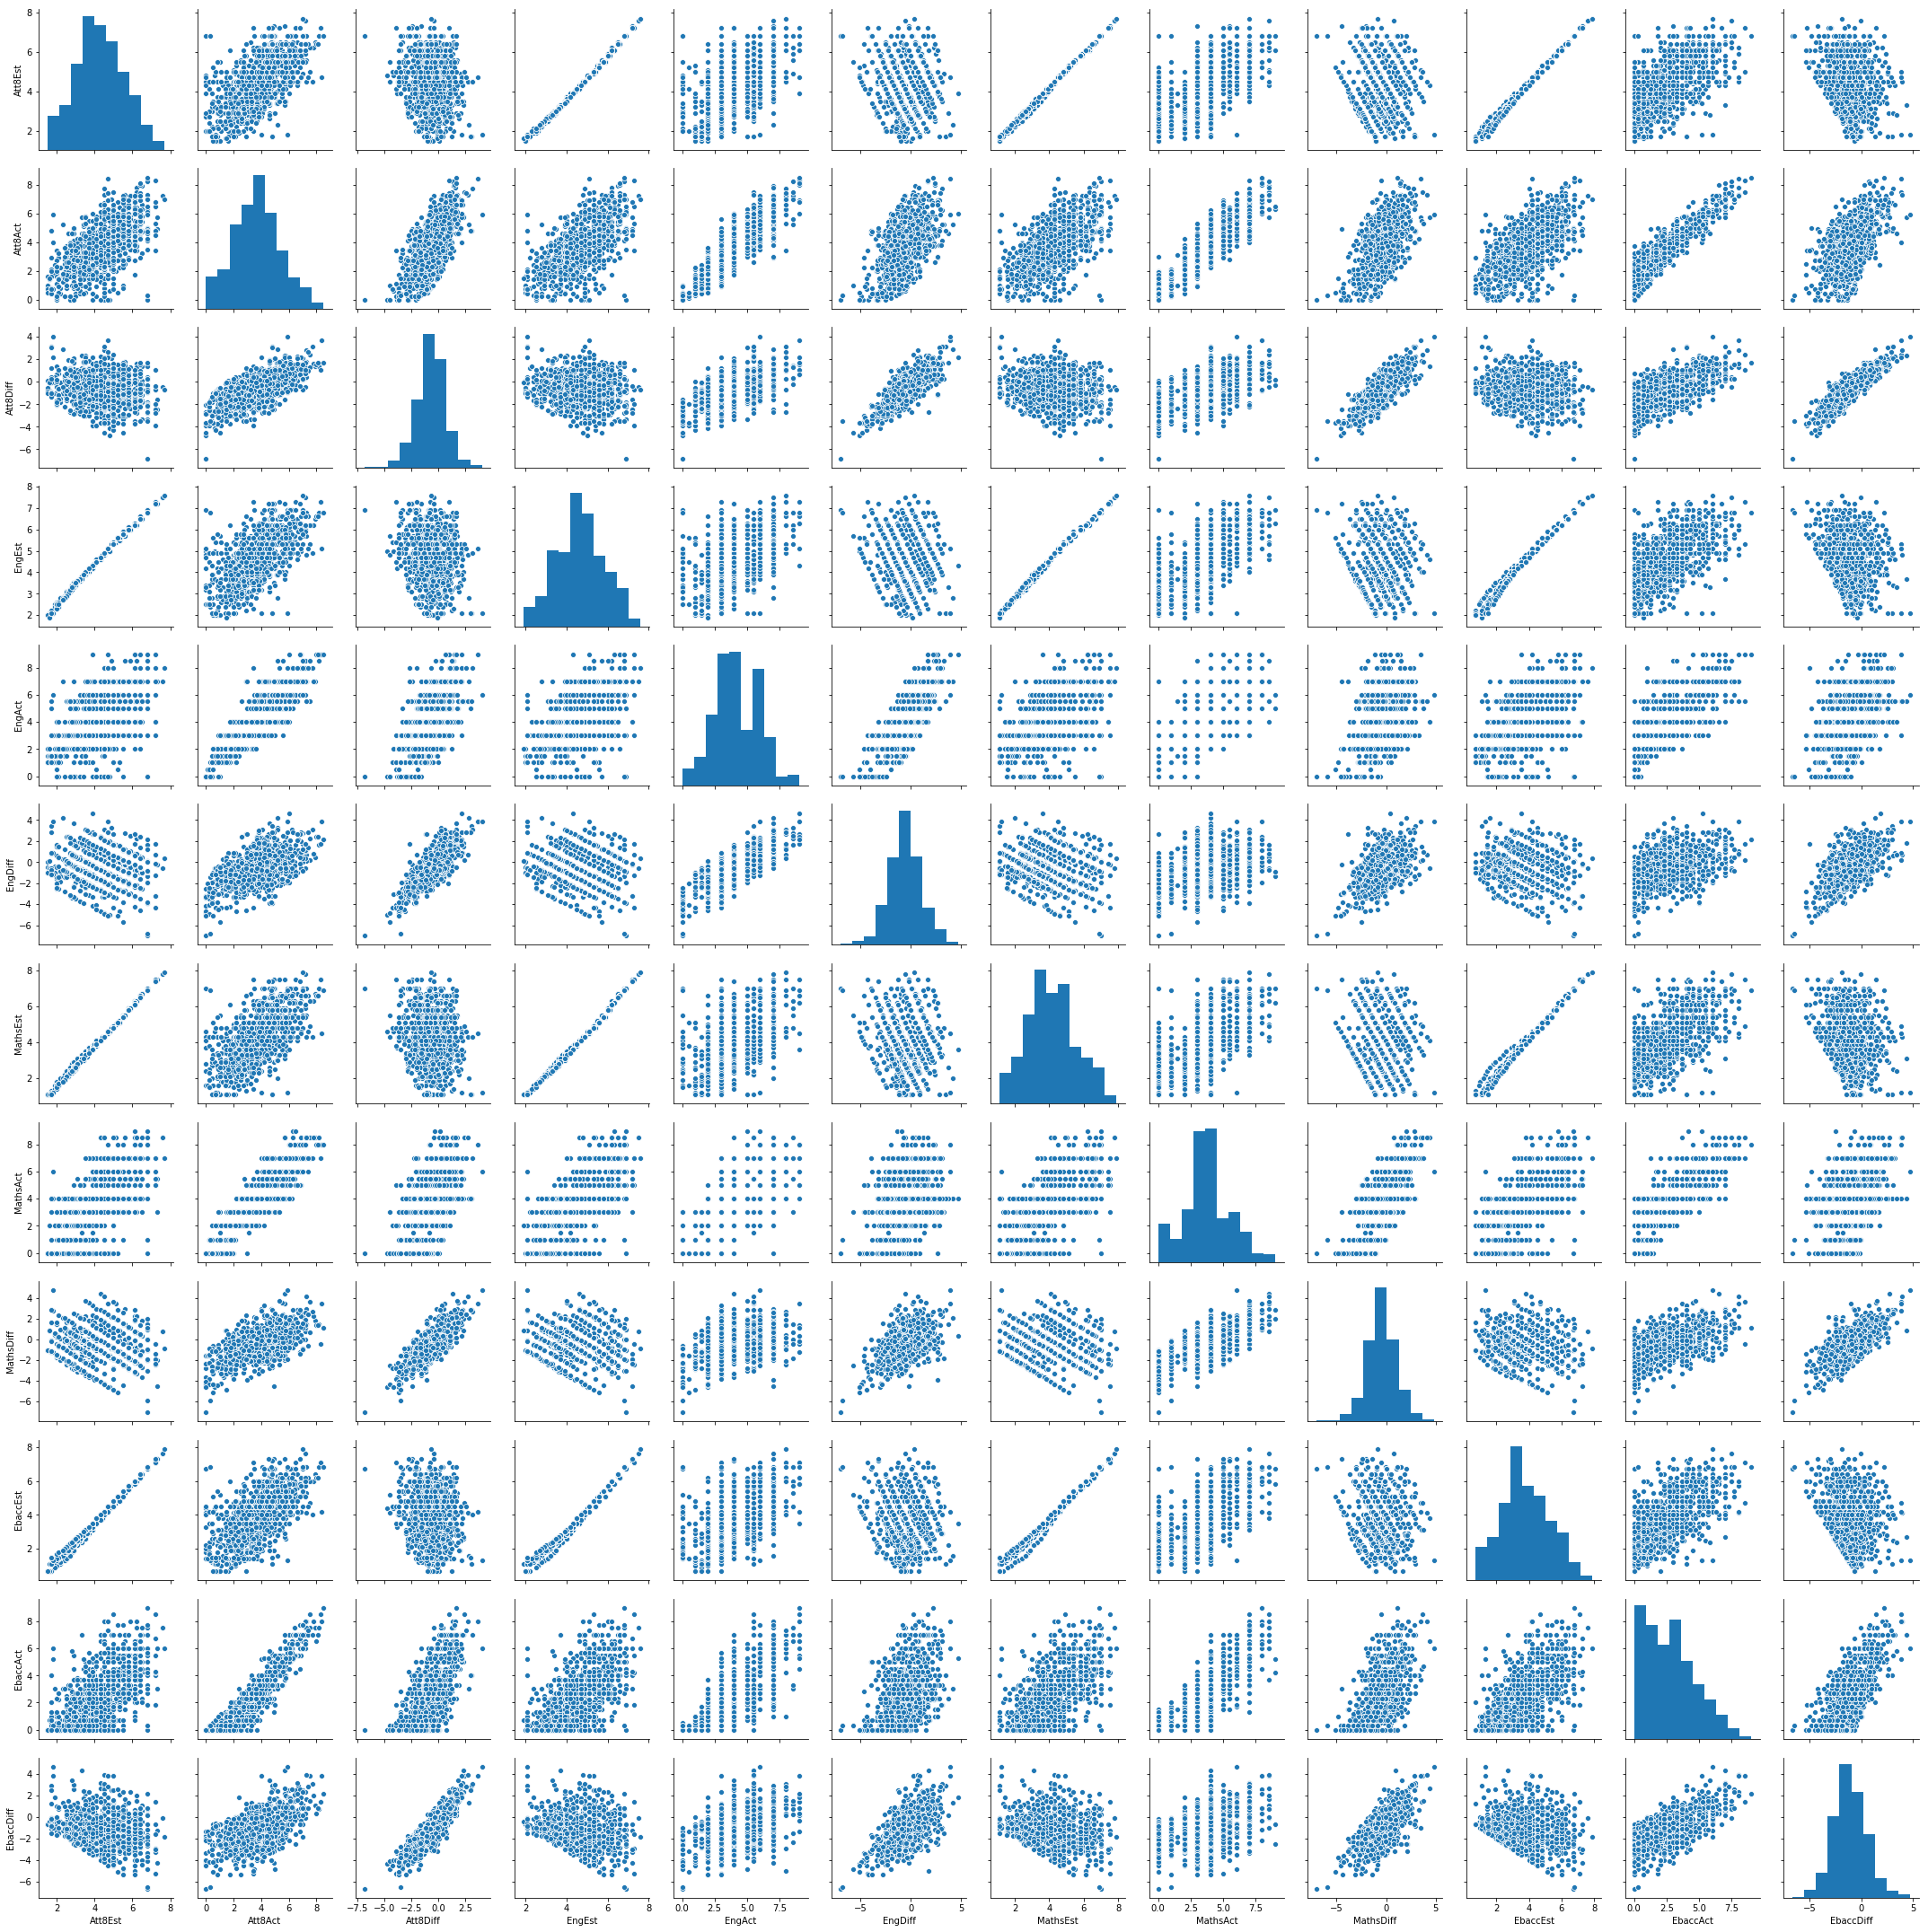

In [25]:
meanCorr = pd.DataFrame(Gradesnumerical)
sns.pairplot(meanCorr)
plt.show()

- This correlation matrix shows that some of the variables have continuous graphs and that some of the variables have discrete graphs.

In [26]:
Gradesnumerical.describe()

,Att8Est,Att8Act,Att8Diff,EngEst,EngAct,EngDiff,MathsEst,MathsAct,MathsDiff,EbaccEst,EbaccAct,EbaccDiff
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,4.291943,3.665453,-0.637914,4.646358,4.105408,-0.542759,4.129581,3.676049,-0.457517,3.822627,2.700442,-1.117009
std,1.269772,1.677662,1.321783,1.157828,1.837360,1.589882,1.408525,1.905117,1.454297,1.468320,1.939824,1.598323
min,1.500000,0.000000,-6.810000,1.900000,0.000000,-6.940000,1.100000,0.000000,-7.010000,0.700000,0.000000,-6.650000
25%,3.400000,2.500000,-1.410000,3.900000,3.000000,-1.520000,3.200000,3.000000,-1.280000,2.800000,1.000000,-2.140000
50%,4.300000,3.700000,-0.620000,4.600000,4.000000,-0.570000,4.100000,4.000000,-0.490000,3.800000,2.400000,-1.160000
75%,5.175000,4.700000,0.210000,5.475000,5.500000,0.470000,5.075000,5.000000,0.407500,4.800000,4.000000,-0.110000
max,7.700000,8.500000,4.040000,7.600000,9.000000,4.670000,7.900000,9.000000,4.800000,7.900000,9.000000,4.680000


In [27]:
Gradesnumerical.dtypes

Att8Est      float64
Att8Act      float64
Att8Diff     float64
EngEst       float64
EngAct       float64
EngDiff      float64
MathsEst     float64
MathsAct     float64
MathsDiff    float64
EbaccEst     float64
EbaccAct     float64
EbaccDiff    float64
dtype: object

- Shows that all of the variables in this dataframe are float64 (continuous) variables.

# Machine Learning

# Linear Regression

In [28]:
import  statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

- Import packages for linear regression and train test split.

In [29]:
x = Gradesnumerical[['EngAct', 'MathsAct', 'EbaccAct']]
y = Gradesnumerical['Att8Act']

- Setup train test split x and y variables using the actual grades from the data.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(634, 3) (634,)
(272, 3) (272,)


- There are 634 rows and 3 columns for x_train.
- There are 272 rows and 3 columns for x_test.
- There are 634 rows and 1 column for y_train.
- There are 272 rows and 1 column for y_test.

In [31]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

- Fitting the linear regression model to the train test split.

In [32]:
predictions = lm.predict(x_test)

In [33]:
predictions[0:5]

array([3.1899173 , 3.71352311, 3.47404215, 3.42939827, 1.65691066])

- First five numbers that are predictions for the y value.

Text(0, 0.5, 'Predictions')

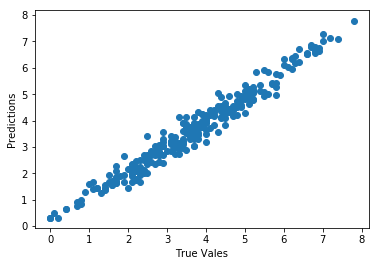

In [34]:
plt.scatter(y_test, predictions)
plt.xlabel("True Vales")
plt.ylabel("Predictions")

- Linear scatterplot of the data showing True Values vs Predictions.

In [35]:
print("Score:", model.score(x_test, y_test))

Score: 0.9633201647678618


### Linear Regression Prediction with 96.3% accuracy.

In [36]:
url = 'https://raw.githubusercontent.com/swhaley01/Predicting-Student-Grades/master/Grades3.csv'
Grades3 = pd.read_csv(url)
Grades3.head(10)

,Att8Act,Att8Diff,EngEst,EngAct,EngDiff,MathsEst,MathsAct,MathsDiff,EbaccEst,EbaccDiff,Att8EstSQRT,EbaccActSQRT
0,2.9,1.21,2.2,3.0,0.76,1.3,3.0,1.65,0.7,1.28,1.303840,1.414214
1,6.6,0.74,6.0,7.0,1.03,5.9,7.0,1.13,5.6,-0.08,2.408319,2.345208
2,4.8,-0.11,5.3,5.5,0.24,4.8,7.0,2.15,4.5,-2.51,2.213594,1.414214
3,3.8,0.94,3.4,4.0,0.63,2.8,3.0,0.24,1.8,0.90,1.673320,1.643168
4,4.4,0.64,4.2,4.0,-0.16,3.7,5.5,1.82,2.9,1.09,1.923538,2.000000
5,1.1,-0.92,2.6,1.5,-1.11,1.8,0.0,-1.76,1.0,-0.64,1.414214,0.547723
6,2.3,-1.62,4.3,2.0,-2.31,3.8,3.0,-0.81,3.1,-2.78,1.974842,0.547723
7,2.7,-1.06,4.2,3.0,-1.16,3.7,3.0,-0.68,2.9,-2.41,1.923538,0.707107
8,3.4,0.09,3.8,4.0,0.18,3.3,4.0,0.70,2.4,-1.39,1.816590,1.000000
9,3.7,1.13,3.1,5.5,2.39,2.4,3.0,0.60,1.4,-0.45,1.581139,1.000000


- Read in data from R Studio to use transformed variables.

In [37]:
Grades4 = Grades3.drop(['EngEst', 'MathsEst', 'Att8EstSQRT'], axis = 1)
Grades4.head()

,Att8Act,Att8Diff,EngAct,EngDiff,MathsAct,MathsDiff,EbaccEst,EbaccDiff,EbaccActSQRT
0,2.9,1.21,3.0,0.76,3.0,1.65,0.7,1.28,1.414214
1,6.6,0.74,7.0,1.03,7.0,1.13,5.6,-0.08,2.345208
2,4.8,-0.11,5.5,0.24,7.0,2.15,4.5,-2.51,1.414214
3,3.8,0.94,4.0,0.63,3.0,0.24,1.8,0.90,1.643168
4,4.4,0.64,4.0,-0.16,5.5,1.82,2.9,1.09,2.000000


- Dropped 'EngEst', 'MathsEst', 'Att8EstSQRT' according to step-wise regression performed in R.

In [38]:
x1 = Grades4[['Att8Diff', 'EngAct', 'EngDiff', 'MathsAct', 'MathsDiff', 'EbaccEst', 'EbaccDiff', 'EbaccActSQRT']]
y1 = Grades4['Att8Act']

- Setup for train test split #2 to predict a refined linear regression model.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=101)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(630, 8) (630,)
(271, 8) (271,)


- There are 630 rows and 8 columns for x_train.
- There are 271 rows and 8 columns for x_test.
- There are 630 rows and 1 column for y_train.
- There are 231 rows and 1 column for y_test.

In [40]:
lm2 = LinearRegression()
model2 = lm.fit(x_train, y_train)

- Fitting the linear regression model to the second train test split.

In [41]:
predictions2 = lm.predict(x_test)

In [42]:
predictions2[0:5]

array([3.12102506, 3.84786485, 1.85879437, 2.42320403, 3.31328585])

Text(0, 0.5, 'Predictions2')

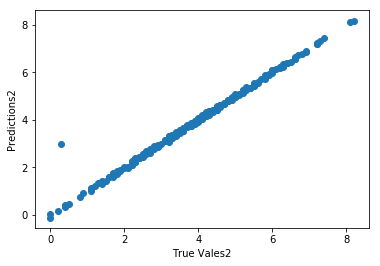

In [43]:
plt.scatter(y_test, predictions2)
plt.xlabel("True Vales2")
plt.ylabel("Predictions2")

In [44]:
print("Score:", model2.score(x_test, y_test))

Score: 0.9887185162198451


### Linear Regression Prediction #2 with 98.9% accuracy.

# Random Forest

In [45]:
def gradesrecode(series):
    if series < 1.0:
        return "U"
    elif 1.0 <= series < 4.0:
        return "D - G"
    elif 4.0 <= series:
        return "A - C"
    
Grades4['Att8ActR'] = Grades4['Att8Act'].apply(gradesrecode)

Grades4['Att8ActR'].value_counts(sort=False)

A - C    385
D - G    466
U         50
Name: Att8ActR, dtype: int64

- Recoded variables as 'A - C', 'D - G' and 'U', to be able to perform Random Forest prediction.

In [46]:
x2 = Grades4[['Att8Diff', 'EngAct', 'EngDiff', 'MathsAct', 'MathsDiff', 'EbaccEst', 'EbaccDiff', 'EbaccActSQRT']]
y2 = Grades4['Att8ActR']

- Setup for train test split #3 to perform random forest.

In [47]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=101)
print (x_train2.shape, y_train2.shape)
print (x_test2.shape, y_test2.shape)

(630, 8) (630,)
(271, 8) (271,)


- There are 630 rows and 8 columns for x_train.
- There are 271 rows and 8 columns for x_test.
- There are 630 rows and 1 column for y_train.
- There are 231 rows and 1 column for y_test.

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

- Import Packages for Random Forest

In [49]:
forest = RandomForestClassifier(n_estimators=500,random_state=76)
forest.fit(x_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=76, verbose=0, warm_start=False)

- Fitting train test split to random forest.

In [50]:
forestPredictions = forest.predict(x_test2)
print(confusion_matrix(y_test2,forestPredictions))
print(classification_report(y_test2, forestPredictions))

[[113   9   0]
 [ 10 128   1]
 [  0   2   8]]
              precision    recall  f1-score   support

       A - C       0.92      0.93      0.92       122
       D - G       0.92      0.92      0.92       139
           U       0.89      0.80      0.84        10

   micro avg       0.92      0.92      0.92       271
   macro avg       0.91      0.88      0.90       271
weighted avg       0.92      0.92      0.92       271



### Random Forest Prediction with 92% accuracy.

# Summary:

- In this notebook there are two linear regression predictions and one random forest prediction.
- The model with the highest prediction was the linear regression model that used step-wise regression from R studio code.
- Linear Regression Prediction #1: 96.3% accuracy.
- Linear Regression Prediction #2: 98.9% accuracy.
- Random Forest Regression Prediction: 92% accuracy.
- Overall, the best prediction was the Linear Regression #2 with 98.9% accuracy.

# Conclusions:

- This model is great at predicting student grades.  However, it will never replace the students actually earning their grades.
- This model can be used as a marker for student weaknesses and strengths.  
- Teachers and administrators can use the predictions to determine where a student may need reteaching and reinforcement and where a student may not need extra focus.
- It also shows content or topics that students struggle with overall where the teacher may need to spend more time on from the first lesson on.
- In conclusion, this is a great tool for teachers and administrators to use in the grading and evaluating process to help students gain a better understanding of the material that is to be learned.